In [1]:
import pandas as pd

In [2]:
# Считаем при помощи pandas исходный файл с табуляцией в качестве разделителя, задав нужные нам имена колонок
df = pd.read_csv('geo-reviews-dataset-2023.tskv', sep='\t', header=None, names=['address', 'name_ru', 'rating', 'rubrics', 'text'])
columns = df.columns.to_list()
# Пройдем в цикле по колонкам и удалим из ячеек ключи
for column in columns:
    df[column] = df[column].replace(f'{column}=', '', regex=True)

df = df.dropna(ignore_index=True)
df['rating'] = df['rating'].replace('\.', '', regex=True)
df['rating'] = pd.to_numeric(df['rating'])
df['review_length'] = df['text'].str.len()

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<Axes: xlabel='rating', ylabel='review_length'>

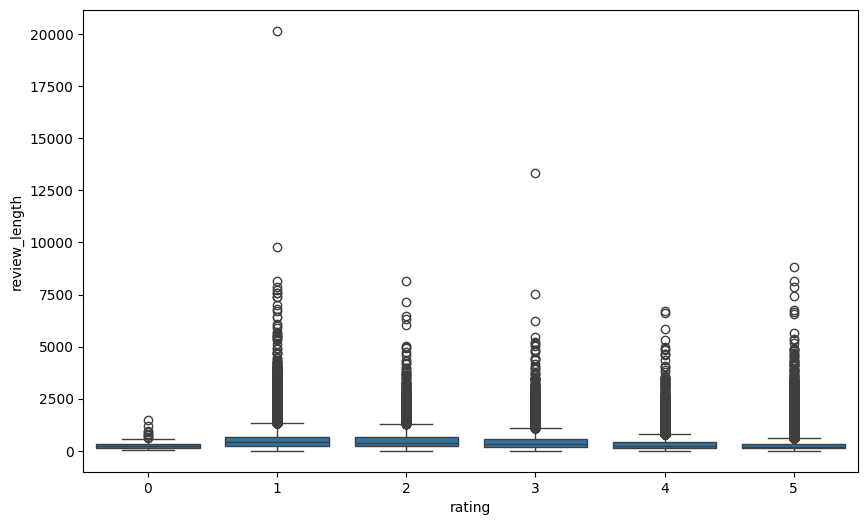

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='review_length', data=df)

In [5]:
dfs = []
for rating in range(1, 6):
    df_rating = df[df['rating'] == rating]
    q3 = df_rating['review_length'].quantile(0.75)
    dfs.append(df_rating[df_rating['review_length'] < q3])

df_filtered = pd.concat(dfs).reset_index().drop('index', axis=1)
df_filtered

,address,name_ru,rating,rubrics,text,review_length
0,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я...",485
1,"Ставропольский край, Невинномысск, улица Павло...",Эште Дёнер,1,Кафе;Быстрое питание;Доставка еды и обедов,"1. Доставка очень долгая, на рекламной брошюре...",286
2,"Московская область, Наро-Фоминск, улица Калини...",Автомойка Чистякоff,1,Автомойка,Раньше было нормально и мыли хорошо. Но больше...,243
3,"Санкт-Петербург, Московский проспект, 183-185Ак4",Лик,1,Косметология;Салон красоты;Ногтевая студия;Эпи...,Клиника не дорожит клиентами! Ни о какой конфи...,473
4,"Московская область, Жуковский, улица Баженова, 2А",Made in Vietnam,1,Быстрое питание,Заказали фо-бо и том-ям\nКороче больше не прид...,379
...,...,...,...,...,...,...
373620,"Москва, улица Юных Ленинцев, 52",Petruccio. Pizza&Pasta,5,Ресторан;Кафе;Пиццерия,"Пицца детям понравилась, интерьер очень интере...",149
373621,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,5,Железнодорожная станция,Редко бываю здесь. В основном проездом в г. Ви...,122
373622,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,5,Железнодорожная станция,Отличный пересадочный узел.,28
373623,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,5,Железнодорожная станция,Хороший способ избежать автобусной пытки. Элек...,76


<Axes: xlabel='rating', ylabel='review_length'>

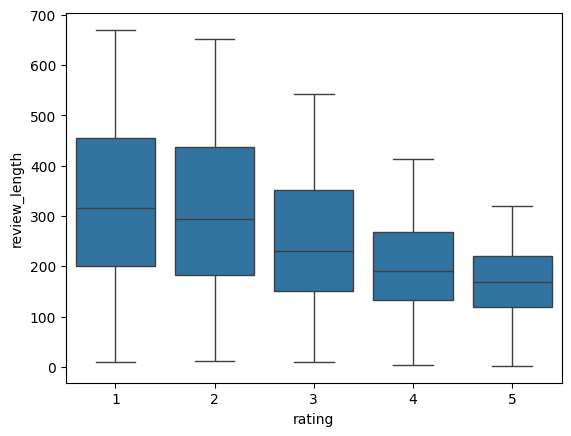

In [6]:
sns.boxplot(x='rating', y='review_length', data=df_filtered)

<Axes: xlabel='rating', ylabel='Count'>

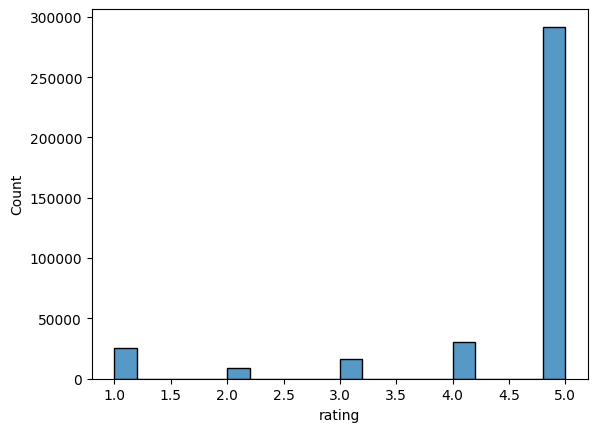

In [7]:
sns.histplot(df_filtered['rating'])

<Axes: xlabel='review_length', ylabel='Count'>

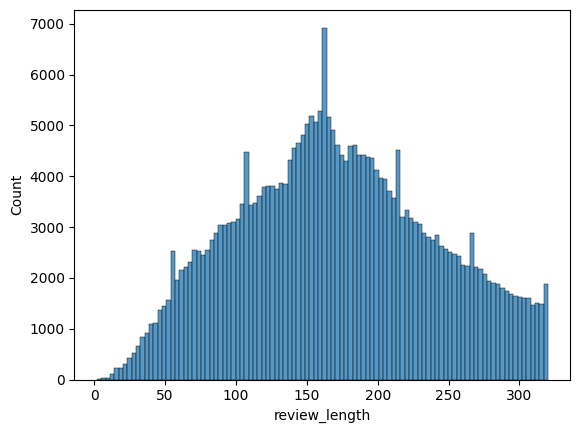

In [8]:
sns.histplot(df_filtered[df_filtered['rating'] == 5]['review_length'])

In [9]:
df_filtered[df_filtered['rating'] == 5]

,address,name_ru,rating,rubrics,text,review_length
81816,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ...",158
81817,"Иркутская область, Черемхово, Первомайская ули...",Tele2,5,Оператор сотовой связи;Интернет-провайдер,"Приятное общение, все доступно объяснили, мне ...",57
81818,"Пермь, улица Солдатова, 15",Smoking Park,5,Вейп-шоп;Магазин табака и курительных принадле...,"Лучший шоп на крохалях \nБольшоц ассортимент, ...",129
81819,"Москва, 4-й Кожевнический переулок, 4",Jinju,5,Кафе;Кофейня,"5 из 5🖤 Пил кофе и в Риме, и в Париже, но вку...",270
81820,"Ростовская область, Таганрог, улица Чучева, 38",Kari ГИПЕР,5,Магазин обуви;Ювелирный магазин;Детские игрушк...,"Очень большой выбор обуви для всей семьи, по р...",124
...,...,...,...,...,...,...
373620,"Москва, улица Юных Ленинцев, 52",Petruccio. Pizza&Pasta,5,Ресторан;Кафе;Пиццерия,"Пицца детям понравилась, интерьер очень интере...",149
373621,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,5,Железнодорожная станция,Редко бываю здесь. В основном проездом в г. Ви...,122
373622,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,5,Железнодорожная станция,Отличный пересадочный узел.,28
373623,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,5,Железнодорожная станция,Хороший способ избежать автобусной пытки. Элек...,76


In [10]:
import re

def filter_text(text: str):
    text = text.replace('\\n', '. ')

    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    return text


df_filtered['text_filtered'] = df_filtered['text'].apply(filter_text)

In [11]:
df_filtered['rating'].value_counts()

rating
5    291809
4     30830
1     25706
3     16230
2      9050
Name: count, dtype: int64

In [12]:
df_balanced = pd.concat([
    df_filtered[df_filtered['rating'] != 5],
    df_filtered[df_filtered['rating'] == 5].sample(n=30830, replace=False)
    ]).reset_index().drop('index', axis=1)

df_balanced

,address,name_ru,rating,rubrics,text,review_length,text_filtered
0,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я...",485,"Не знаю смутят ли кого-то данные правила, но я..."
1,"Ставропольский край, Невинномысск, улица Павло...",Эште Дёнер,1,Кафе;Быстрое питание;Доставка еды и обедов,"1. Доставка очень долгая, на рекламной брошюре...",286,"1. Доставка очень долгая, на рекламной брошюре..."
2,"Московская область, Наро-Фоминск, улица Калини...",Автомойка Чистякоff,1,Автомойка,Раньше было нормально и мыли хорошо. Но больше...,243,Раньше было нормально и мыли хорошо. Но больше...
3,"Санкт-Петербург, Московский проспект, 183-185Ак4",Лик,1,Косметология;Салон красоты;Ногтевая студия;Эпи...,Клиника не дорожит клиентами! Ни о какой конфи...,473,Клиника не дорожит клиентами! Ни о какой конфи...
4,"Московская область, Жуковский, улица Баженова, 2А",Made in Vietnam,1,Быстрое питание,Заказали фо-бо и том-ям\nКороче больше не прид...,379,Заказали фо-бо и том-ям. Короче больше не прид...
...,...,...,...,...,...,...,...
112641,"Санкт-Петербург, Пулковское шоссе, 25, корп. 1",Лето,5,Торговый центр;Развлекательный центр,"Отличный ТЦ, всегда уезжаю с покупками. На пер...",147,"Отличный ТЦ, всегда уезжаю с покупками. На пер..."
112642,"Ярославская область, Углич, Ярославская улица, 8",Столовая Волга,5,Столовая;Кафе,"Хорошее место, чтобы поесть вкусно и недорого ...",149,"Хорошее место, чтобы поесть вкусно и недорого ..."
112643,"Ленинградская область, Всеволожск, Заводская у...",Fix Price,5,Товары для дома;Магазин хозтоваров и бытовой х...,"Хороший, нужный магазин. Есть всё!!! И цена пр...",90,"Хороший, нужный магазин. Есть всё!!! И цена пр..."
112644,"Москва, Новинский бульвар, 18Б",Open Foto,5,Фотошкола;Дополнительное образование;Курсы и м...,Все понравилось! Обучение очень интересное! Ес...,62,Все понравилось! Обучение очень интересное! Ес...


In [13]:
df_balanced['rating'].value_counts()

rating
5    30830
4    30830
1    25706
3    16230
2     9050
Name: count, dtype: int64

In [14]:
def format_review(row):
    category_str = 'Категории: ' + ', '.join(row['rubrics'].split(';'))
    rating_to_quality = {
        1: 'Очень негативный отзыв',
        2: 'Негативный отзыв',
        3: 'Обычный отзыв',
        4: 'Положительный отзыв',
        5: 'Очень положительный отзыв'
    }

    return f"{category_str}. {rating_to_quality[row['rating']]}: {row['text_filtered']}"

df_balanced['formatted_text'] = df_balanced.apply(format_review, axis=1)

In [15]:
df_balanced['formatted_text']

0         Категории: Фитнес-клуб. Очень негативный отзыв...
1         Категории: Кафе, Быстрое питание, Доставка еды...
2         Категории: Автомойка. Очень негативный отзыв: ...
3         Категории: Косметология, Салон красоты, Ногтев...
4         Категории: Быстрое питание. Очень негативный о...
                                ...                        
112641    Категории: Торговый центр, Развлекательный цен...
112642    Категории: Столовая, Кафе. Очень положительный...
112643    Категории: Товары для дома, Магазин хозтоваров...
112644    Категории: Фотошкола, Дополнительное образован...
112645    Категории: Магазин чая, Магазин подарков и сув...
Name: formatted_text, Length: 112646, dtype: object

In [16]:
from datasets import Dataset
from transformers import DataCollatorForLanguageModeling
from transformers import GPT2Tokenizer

# Загрузка токенизатора GPT-2
tokenizer = GPT2Tokenizer.from_pretrained("ai-forever/rugpt3small_based_on_gpt2")
tokenizer.pad_token = tokenizer.eos_token

In [17]:
dataset = Dataset.from_pandas(df_balanced[['formatted_text']])

# Токенизация всех текстов
def tokenize_data(batch):
    return tokenizer(batch['formatted_text'], truncation=True, padding="max_length", max_length=512)

tokenized_dataset = dataset.map(tokenize_data, batched=True)

Map:   0%|          | 0/112646 [00:00<?, ? examples/s]

In [18]:
# Разделение на train/test
train_test_split = tokenized_dataset.train_test_split(test_size=0.1)
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

# Создание collator для задачи языкового моделирования
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # GPT-2 не использует маскирование
)

In [19]:
from transformers import GPT2LMHeadModel, Trainer, TrainingArguments
import torch

In [20]:
model = GPT2LMHeadModel.from_pretrained("ai-forever/rugpt3small_based_on_gpt2")

# Настройка параметров обучения
training_args = TrainingArguments(
    output_dir="./model_ru2",  # Папка для сохранения модели
    overwrite_output_dir=True,
    num_train_epochs=3,  # Количество эпох
    per_device_train_batch_size=8,  # Размер батча для обучения
    per_device_eval_batch_size=8,  # Размер батча для проверки
    warmup_steps=500,  # Количество шагов разогрева
    weight_decay=0.01,  # Сила L2-регуляризации
    logging_dir='./logs',  # Папка для логов
    logging_steps=10,
    save_steps=500,
    save_total_limit=2,  # Хранить только две последние сохраненные модели
)

# Создание объекта Trainer для простоты обучения
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
)

In [21]:
trainer.train()

  0%|          | 0/38019 [00:00<?, ?it/s]

{'loss': 9.2001, 'grad_norm': 66.83695220947266, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.0}
{'loss': 8.2175, 'grad_norm': 57.84044647216797, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.0}
{'loss': 7.1409, 'grad_norm': 19.396543502807617, 'learning_rate': 3e-06, 'epoch': 0.0}
{'loss': 6.1806, 'grad_norm': 16.47613525390625, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.0}
{'loss': 5.7066, 'grad_norm': 12.538589477539062, 'learning_rate': 5e-06, 'epoch': 0.0}
{'loss': 5.3061, 'grad_norm': 12.405579566955566, 'learning_rate': 6e-06, 'epoch': 0.0}
{'loss': 4.8086, 'grad_norm': 9.413336753845215, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.01}
{'loss': 4.5415, 'grad_norm': 8.084555625915527, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.01}
{'loss': 4.2905, 'grad_norm': 10.38487434387207, 'learning_rate': 9e-06, 'epoch': 0.01}
{'loss': 4.0895, 'grad_norm': 6.442852973937988, 'learning_rate': 1e-05, 'epoch': 0.01}
{'loss': 4.0453, 'grad_norm': 7.338621616

TrainOutput(global_step=38019, training_loss=2.8124556625600197, metrics={'train_runtime': 31641.5034, 'train_samples_per_second': 9.612, 'train_steps_per_second': 1.202, 'total_flos': 7.9470142488576e+16, 'train_loss': 2.8124556625600197, 'epoch': 3.0})

In [22]:
trainer.save_model()

In [33]:
def generate_review(category, rating, temperature):
    category_str = 'Категории: ' + ', '.join(category.split(';'))
    rating_to_quality = {
        1: 'Очень негативный отзыв',
        2: 'Негативный отзыв',
        3: 'Обычный отзыв',
        4: 'Положительный отзыв',
        5: 'Очень положительный отзыв'
    }

    input_text = f"{category_str}. {rating_to_quality[rating]}:"

    input_ids = tokenizer.encode(input_text, return_tensors="pt").cuda()

    # Генерация текста
    with torch.no_grad():
        output = model.generate(input_ids, max_length=512, num_return_sequences=1, temperature=temperature, do_sample=True)
            
    # Декодирование и вывод текста
    review = tokenizer.decode(output[0], clean_up_tokenization_spaces=True)
    return review


In [49]:

# Пример генерации отзыва
generated_review = [generate_review("Ресторан", i + 1, 0.8) for i in range(5)]
generated_review

['Категории: Ресторан. Очень негативный отзыв: Была в этом заведении первый раз, пришла поужинать. Зашли с другом, спросили, кто хочет покушать, нам ответили, что у нас есть свой стол, но у нас нет. Заказ получили. Зашли в зал, в итоге нам предложили сесть у окна, по факту нас не могли посадить, потому что нас посадили за второй столик. Мы сели за столик. Официант сказала, что мест нет и не сказала, поэтому нам сказали, что нет мест нет.  Я сразу сказала подойти к нам, и тут у столика освободится только 1 из 3 столов рядом с нами, и он сказал, что места нет, мы встали за другим. Я подошла за нашим столом. Я спросила у официанта, кто у нас за столом, и мне предложили сесть к нам. Подошла девушка, с таким лицом, как будто мы к ней в долг прождали официанту. Так как я не просила ничего у нас, но мне ответили, что у вас стол свободен. Принесли заказ, я сказала, заказала суп, в итоге я сказала, что нет, он ушёл к нам и сказал что у нас только меню, я попросила, он сказал, что больше мы у не